# Import Libraries

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data from github

In [174]:
df = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [175]:
df['btc_market_price'][1023]

13.6888

In [176]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [177]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

# Dealing with correlation

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [179]:
df.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392474,0.999783,0.868813,0.674507,0.544033,-0.076400,0.544125,0.275250,0.920876,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392474,1.000000,0.384568,0.285815,0.779705,0.851554,0.274925,0.831414,0.668119,0.488668,...,-0.079864,0.372758,0.820595,0.832865,0.782652,0.814721,0.800405,0.290952,0.211814,0.387920
btc_market_cap,0.999783,0.384568,1.000000,0.869316,0.672863,0.541310,-0.080742,0.541702,0.271929,0.922073,...,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868813,0.285815,0.869316,1.000000,0.521061,0.416060,-0.068798,0.430265,0.216617,0.758304,...,-0.009456,0.691630,0.539430,0.453644,0.525484,0.441964,0.449660,0.097722,0.056079,0.896016
btc_blocks_size,0.674507,0.779705,0.672863,0.521061,1.000000,0.955978,0.050864,0.946702,0.511763,0.826119,...,-0.030112,0.443102,0.966650,0.950189,0.999785,0.951959,0.961206,0.251049,0.152055,0.672394
btc_avg_block_size,0.544033,0.851554,0.541310,0.416060,0.955978,1.000000,0.147514,0.977887,0.555426,0.687581,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_orphaned_blocks,-0.076400,0.274925,-0.080742,-0.068798,0.050864,0.147514,1.000000,0.114178,0.071636,-0.092103,...,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
btc_n_transactions_per_block,0.544125,0.831414,0.541702,0.430265,0.946702,0.977887,0.114178,1.000000,0.560052,0.670598,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.275250,0.668119,0.271929,0.216617,0.511763,0.555426,0.071636,0.560052,1.000000,0.346172,...,-0.055222,0.178982,0.514264,0.545911,0.513363,0.510871,0.535190,0.308597,0.217121,0.281442
btc_hash_rate,0.920876,0.488668,0.922073,0.758304,0.826119,0.687581,-0.092103,0.670598,0.346172,1.000000,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


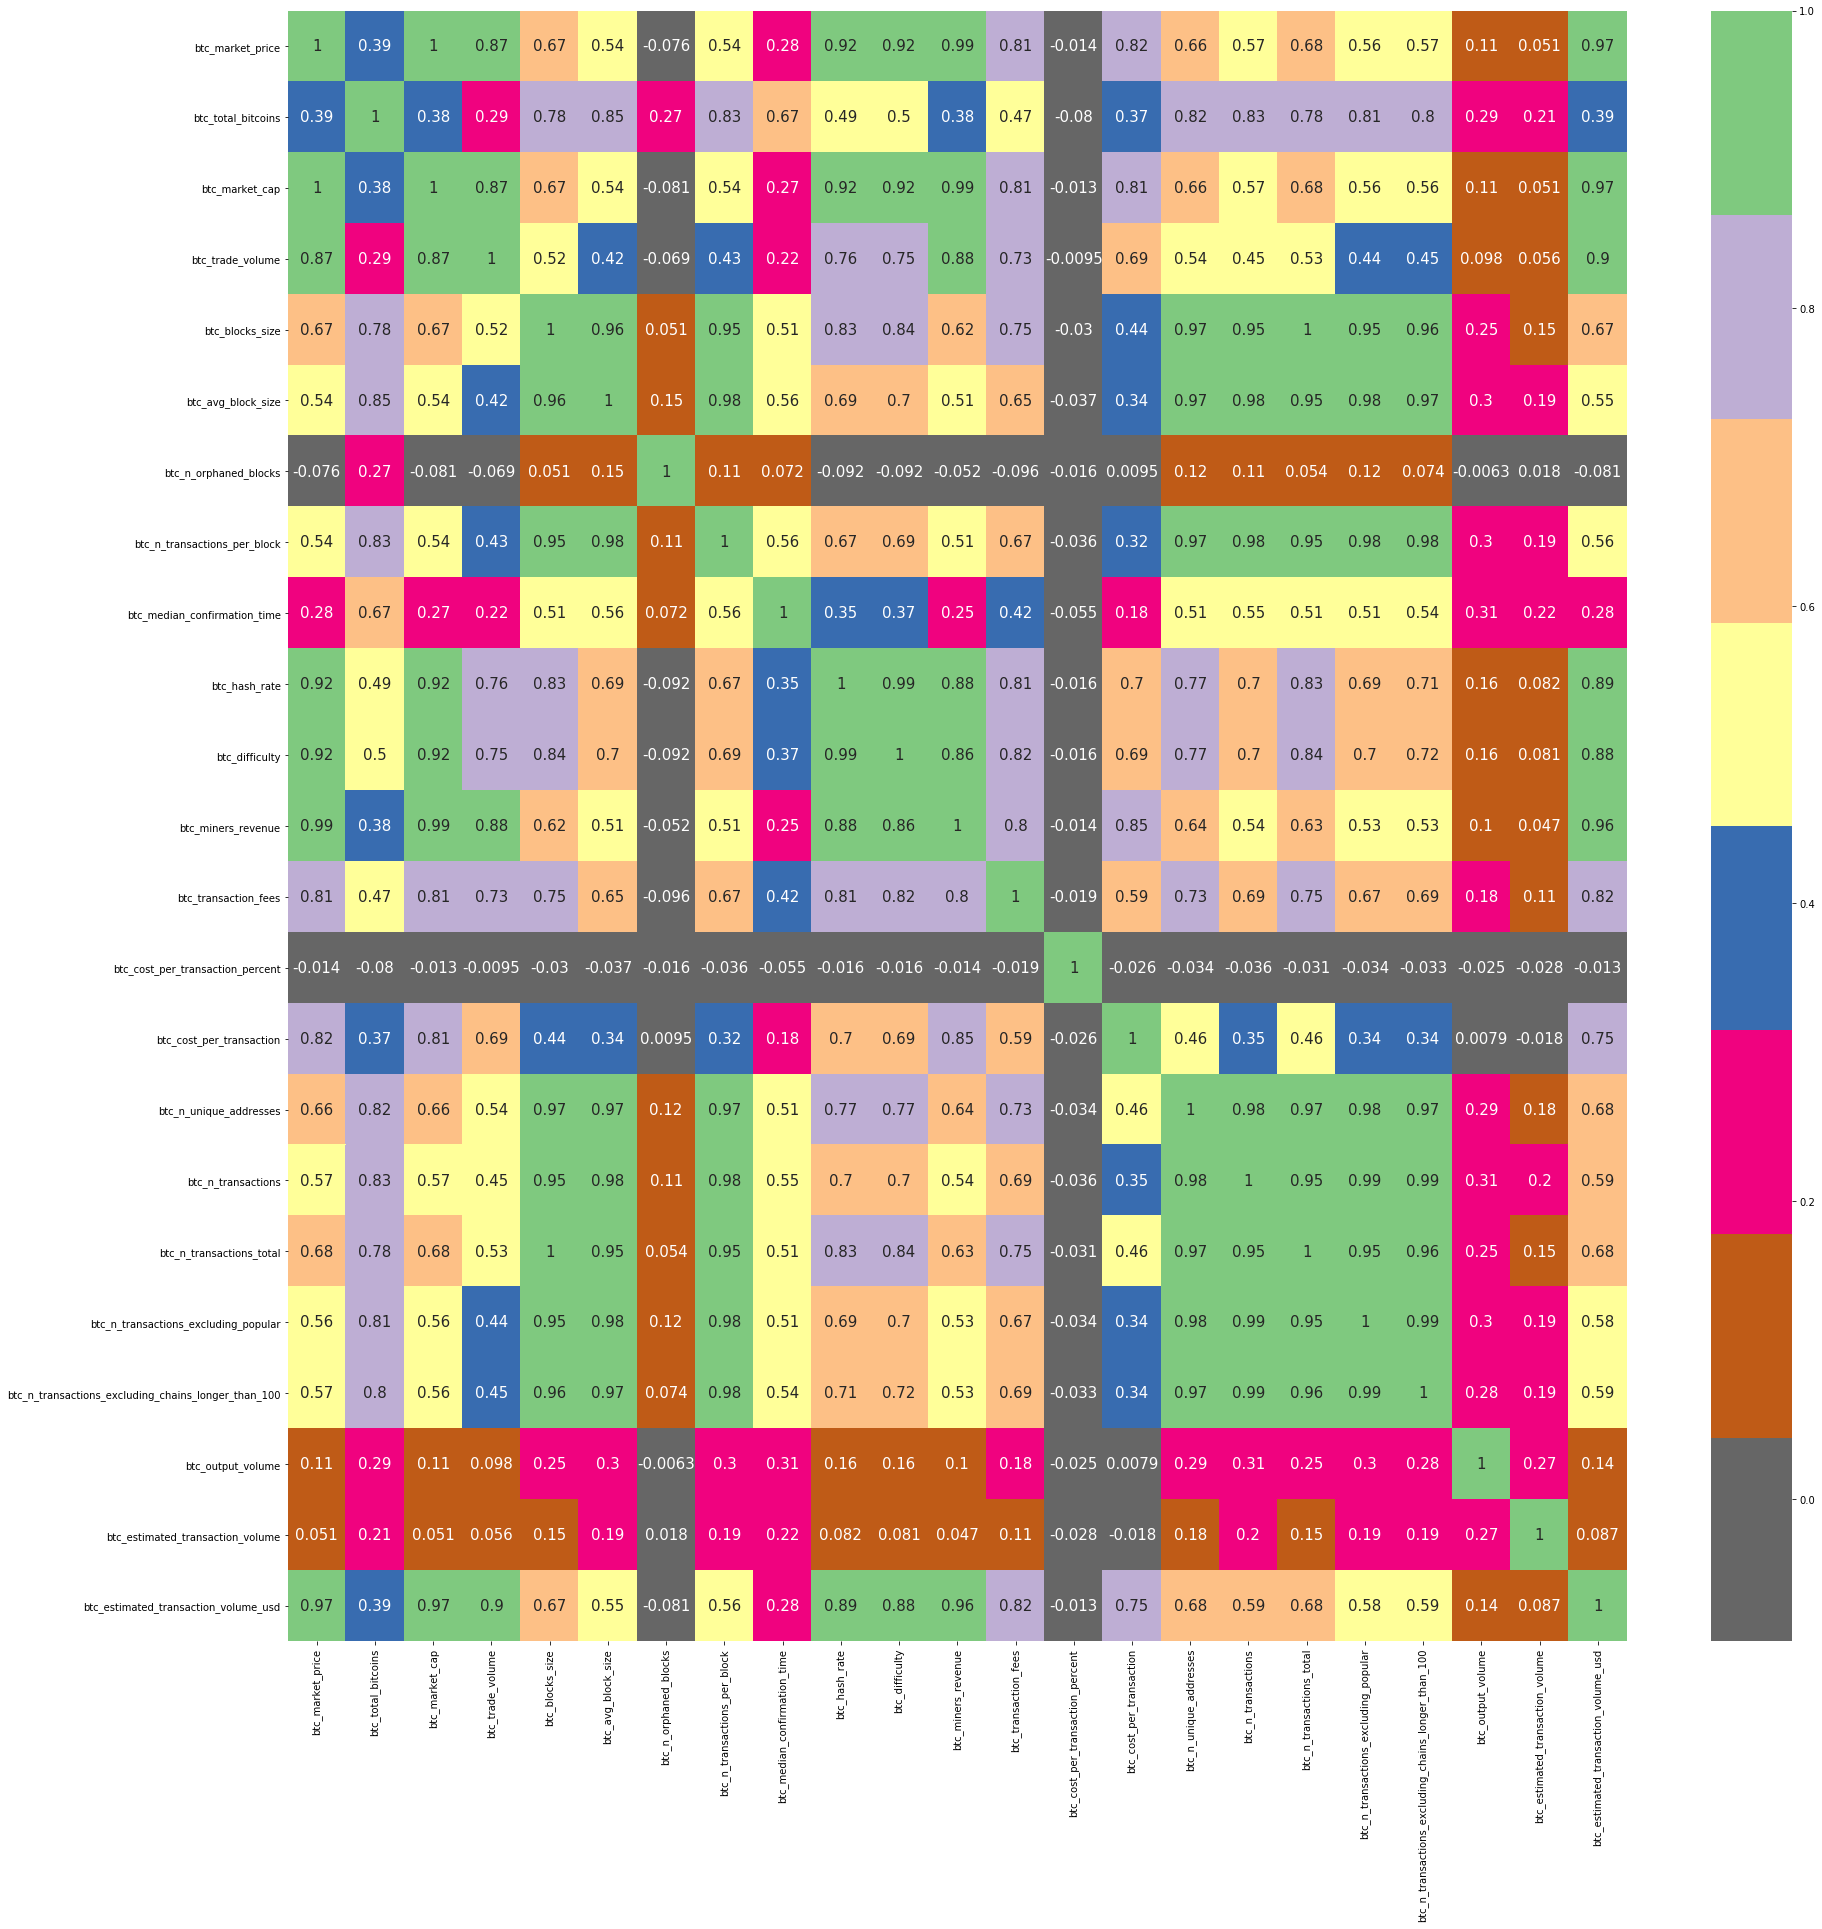

In [180]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr() , annot=True , cmap=plt.cm.Accent_r,annot_kws={'fontsize':15})
plt.show()

In [440]:
def correlation(data , threshold):
    corr = data.corr()['btc_market_price'].sort_values(ascending=False)[1:]
    abs_corr = abs(corr)
    relevant_features = abs_corr[abs_corr>threshold]
    return relevant_features

In [441]:
corr_features = correlation(df,0.81)

In [442]:
corr_features

btc_market_cap                          0.999783
btc_miners_revenue                      0.986732
btc_estimated_transaction_volume_usd    0.968308
btc_hash_rate                           0.920876
btc_difficulty                          0.916937
btc_trade_volume                        0.868813
btc_cost_per_transaction                0.815507
Name: btc_market_price, dtype: float64

In [443]:
len(corr_features)

7

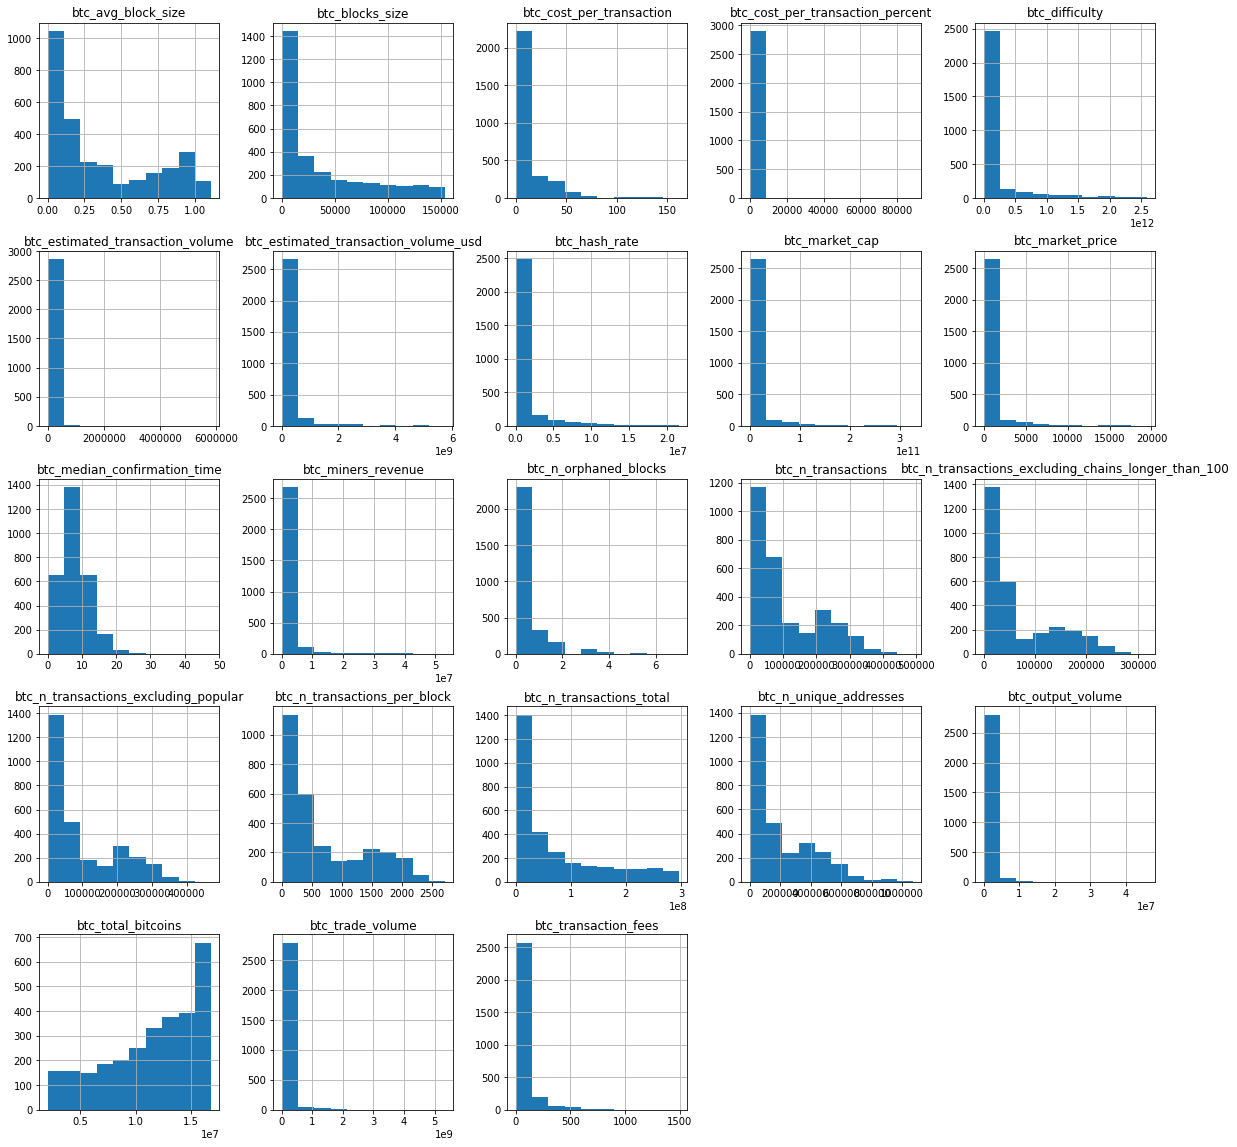

In [444]:
df.hist(figsize=(20,20))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


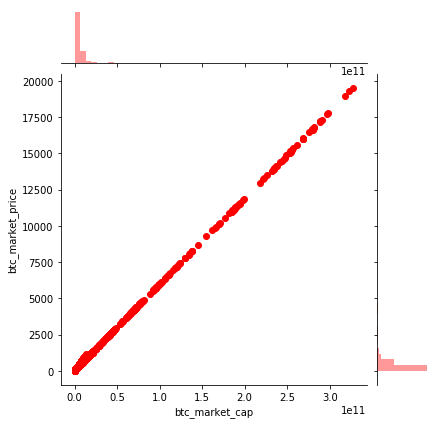

In [445]:
sns.jointplot(df['btc_market_cap'] , df['btc_market_price'],color='red')

In [446]:
# btc_market_price is highly correlated with btc_market_cap

In [447]:
df1 = df[corr_features.index]

In [448]:
df1.shape

(2906, 7)

## Dealing with null values

In [449]:
df1.isnull().sum()

btc_market_cap                           0
btc_miners_revenue                       0
btc_estimated_transaction_volume_usd     0
btc_hash_rate                            0
btc_difficulty                          16
btc_trade_volume                        21
btc_cost_per_transaction                 0
dtype: int64

In [450]:
df1['btc_difficulty'] = df1['btc_difficulty'].fillna(df1['btc_difficulty'].mean())
df1['btc_trade_volume'] = df1['btc_trade_volume'].fillna(df1['btc_trade_volume'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [451]:
df1.isnull().sum()

btc_market_cap                          0
btc_miners_revenue                      0
btc_estimated_transaction_volume_usd    0
btc_hash_rate                           0
btc_difficulty                          0
btc_trade_volume                        0
btc_cost_per_transaction                0
dtype: int64

In [452]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 7 columns):
btc_market_cap                          2906 non-null float64
btc_miners_revenue                      2906 non-null float64
btc_estimated_transaction_volume_usd    2906 non-null float64
btc_hash_rate                           2906 non-null float64
btc_difficulty                          2906 non-null float64
btc_trade_volume                        2906 non-null float64
btc_cost_per_transaction                2906 non-null float64
dtypes: float64(7)
memory usage: 159.0 KB


In [453]:
X = df1
y = df['btc_market_price']

In [454]:
X.head()

,btc_market_cap,btc_miners_revenue,btc_estimated_transaction_volume_usd,btc_hash_rate,btc_difficulty,btc_trade_volume,btc_cost_per_transaction
0,0.0,0.0,0.0,0.000029,2.527738,0.0,0.0
1,0.0,0.0,0.0,0.000029,2.527738,0.0,0.0
2,0.0,0.0,0.0,0.000023,2.527738,0.0,0.0
3,0.0,0.0,0.0,0.000028,2.527738,0.0,0.0
4,0.0,0.0,0.0,0.000027,2.527738,0.0,0.0


In [455]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: btc_market_price, dtype: float64

## Train Model

In [515]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=51)

In [516]:
X_train.shape ,  X_test.shape , y_train.shape , y_test.shape

((2324, 7), (582, 7), (2324,), (582,))

## Feature Scaling

In [517]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [518]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [519]:
lr = LinearRegression()

In [520]:
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [521]:
pred = lr.predict(X_test)

In [522]:
pred[0]

605.6689857208098

In [523]:
y_test.iloc[0]

593.33

## ERROR EVALUATION

In [526]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
import math

In [527]:
print(f'Mean Squared Error = {mean_squared_error(y_test,pred)}')
print(f'Root Mean Squared Error = {math.sqrt(mean_squared_error(y_test,pred))}')
print(f'Mean Absolute Error = {mean_absolute_error(y_test,pred)}')

Mean Squared Error = 653.2945043654663
Root Mean Squared Error = 25.5596264519939
Mean Absolute Error = 16.980514262924554


## ThankYou